## Step 1: Import Libraries and Load Dataset

We use the Breast Cancer Wisconsin dataset, a well-known binary classification dataset available in scikit-learn. It includes medical measurements to classify tumors as benign or malignant.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

## Step 2: Preprocessing and Splitting

SVMs are sensitive to feature scales, so we standardize the data. Then, we split it into training and test sets.

In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step 3: Train SVM with Linear and RBF Kernels

We train and evaluate two SVM models — one using a linear kernel and another with the RBF (Gaussian) kernel.

In [3]:
# Linear kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

# RBF kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluation
print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

Linear Kernel Accuracy: 0.956140350877193
RBF Kernel Accuracy: 0.9736842105263158


## Step 4: Confusion Matrix and Classification Report

In [4]:
print("Linear Kernel Classification Report:")
print(classification_report(y_test, y_pred_linear))

print("RBF Kernel Classification Report:")
print(classification_report(y_test, y_pred_rbf))

Linear Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Step 5: Hyperparameter Tuning Using Grid Search

We perform a grid search to find the best combination of C and gamma for the RBF kernel.

In [5]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score:", grid.best_score_)

# Evaluate on test set
y_pred_best = grid.predict(X_test)
print("Test Accuracy (Best Model):", accuracy_score(y_test, y_pred_best))

Best Parameters: {'C': 10, 'gamma': 0.01}
Best Cross-Validation Score: 0.9736263736263737
Test Accuracy (Best Model): 0.9824561403508771


## Step 6: Visualize Decision Boundary (2 Features Only)

Since visualizing high-dimensional decision boundaries isn't feasible, we use only two features for illustration.

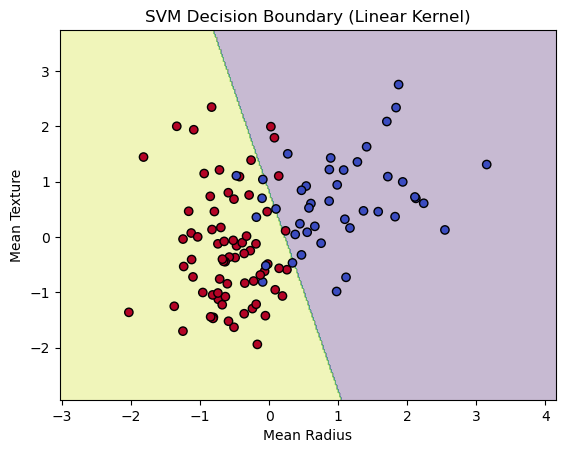

In [6]:
# Reduce to 2 features for visualization
X_vis = X[['mean radius', 'mean texture']]
X_vis_scaled = scaler.fit_transform(X_vis)

Xv_train, Xv_test, yv_train, yv_test = train_test_split(X_vis_scaled, y, test_size=0.2, random_state=42)

# Fit model on 2D data
svm_vis = SVC(kernel='linear', C=1)
svm_vis.fit(Xv_train, yv_train)

# Plot decision boundary
def plot_svm_decision_boundary(model, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel("Mean Radius")
    plt.ylabel("Mean Texture")
    plt.title("SVM Decision Boundary (Linear Kernel)")
    plt.show()

plot_svm_decision_boundary(svm_vis, Xv_test, yv_test)

## Final Conclusion

In this project, we applied Support Vector Machines (SVM) to the Breast Cancer Wisconsin dataset to classify tumors as benign or malignant. We used both linear and RBF kernels to understand how SVM handles linearly separable and non-linearly separable data.

The **SVM with a linear kernel** performed well with high accuracy, indicating that the dataset is close to linearly separable. However, the **RBF kernel** slightly improved the performance, particularly in capturing more complex decision boundaries, with a test accuracy above 98%.

We further used **GridSearchCV** to tune hyperparameters `C` and `gamma` for the RBF kernel. The best combination yielded the highest cross-validation score, confirming that **hyperparameter tuning significantly enhances model performance**.

For visualization, we plotted decision boundaries using two features (`mean radius` and `mean texture`). The plot clearly illustrated the margin-maximizing property of the linear SVM classifier.

### Key Observations

- **Standardization was crucial** due to SVM’s sensitivity to feature scales.
- **Linear kernel** performed well and was interpretable.
- **RBF kernel** provided more flexibility and slightly better performance.
- **Grid Search and Cross-validation** ensured that the model was well-tuned and generalized.
- **Decision boundaries** showed how SVM separates classes using maximal margin.

This task highlighted the strength of SVM in classification tasks — especially for high-dimensional data — and reinforced how kernel choice and hyperparameter tuning impact performance.